<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n250.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.267857,91.708319,49.825800,-327.891342,-156.089367,66.433578,-222.522945
1,0.0,1.0,35.900640,43.427421,54.710062,345.833587,489.871711,81.142214,408.729497
2,0.0,2.0,55.376939,59.816490,31.991567,-294.917190,-137.732194,179.351443,-317.083637
3,0.0,3.0,52.921902,56.429237,38.395764,-82.730618,75.016285,168.195192,-93.178907
4,0.0,4.0,32.641142,28.668851,23.377334,136.154287,230.841615,18.253720,212.587895
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.032208,56.856219,87.499486,-683.307469,-475.919556,145.826779,-621.746335
59996,999.0,56.0,94.726853,46.436488,66.271208,-76.356432,141.078118,81.660636,59.417481
59997,999.0,57.0,95.056273,93.885954,29.906495,-668.186310,-439.337589,58.119902,-497.457492
59998,999.0,58.0,88.311140,66.532061,34.101016,-253.210850,-54.266633,94.371731,-148.638365


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.267857,91.708319,49.825800,-327.891342,-156.089367,66.433578,-222.522945
1,0.0,1.0,35.900640,43.427421,54.710062,345.833587,489.871711,81.142214,408.729497
2,0.0,2.0,55.376939,59.816490,31.991567,-294.917190,-137.732194,179.351443,-317.083637
3,0.0,3.0,52.921902,56.429237,38.395764,-82.730618,75.016285,168.195192,-93.178907
4,0.0,4.0,32.641142,28.668851,23.377334,136.154287,230.841615,18.253720,212.587895
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.032208,56.856219,87.499486,-683.307469,-475.919556,145.826779,-621.746335
59996,999.0,56.0,94.726853,46.436488,66.271208,-76.356432,141.078118,81.660636,59.417481
59997,999.0,57.0,95.056273,93.885954,29.906495,-668.186310,-439.337589,58.119902,-497.457492
59998,999.0,58.0,88.311140,66.532061,34.101016,-253.210850,-54.266633,94.371731,-148.638365


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    20.267857  91.708319  49.825800 -327.891342 -156.089367   
      1.0    35.900640  43.427421  54.710062  345.833587  489.871711   
      2.0    55.376939  59.816490  31.991567 -294.917190 -137.732194   
      3.0    52.921902  56.429237  38.395764  -82.730618   75.016285   
      4.0    32.641142  28.668851  23.377334  136.154287  230.841615   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.032208  56.856219  87.499486 -683.307469 -475.919556   
      56.0   94.726853  46.436488  66.271208  -76.356432  141.078118   
      57.0   95.056273  93.885954  29.906495 -668.186310 -439.337589   
      58.0   88.311140  66.532061  34.101016 -253.210850  -54.266633   
      59.0   60.864494  26.313309  47.957965   93.899975  239.035743   

                  y_hat       e_hat  
rep   index                          
0.0   0.0     66.433578 -222.522945  
      1.0     81.142214  408.729497  
      2.0    179.351443 -317.083637  
      3.0    168.195192  -93.178907  
      4.0     18.253720  212.587895  
...                 ...         ...  
999.0 55.0   145.826779 -621.746335  
      56.0    81.660636   59.417481  
      57.0    58.119902 -497.457492  
      58.0    94.371731 -148.638365  
      59.0   179.298367   59.737376  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    20.267857  91.708319  49.825800 -327.891342 -156.089367   
      1.0    35.900640  43.427421  54.710062  345.833587  489.871711   
      2.0    55.376939  59.816490  31.991567 -294.917190 -137.732194   
      3.0    52.921902  56.429237  38.395764  -82.730618   75.016285   
      4.0    32.641142  28.668851  23.377334  136.154287  230.841615   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.032208  56.856219  87.499486 -683.307469 -475.919556   
      56.0   94.726853  46.436488  66.271208  -76.356432  141.078118   
      57.0   95.056273  93.885954  29.906495 -668.186310 -439.337589   
      58.0   88.311140  66.532061  34.101016 -253.210850  -54.266633   
      59.0   60.864494  26.313309  47.957965   93.899975  239.035743   

                  y_hat       e_hat  
rep   index                          
0.0   0.0     66.433578 -222.522945  
      1.0     81.142214  408.729497  
      2.0    179.351443 -317.083637  
      3.0    168.195192  -93.178907  
      4.0     18.253720  212.587895  
...                 ...         ...  
999.0 55.0   145.826779 -621.746335  
      56.0    81.660636   59.417481  
      57.0    58.119902 -497.457492  
      58.0    94.371731 -148.638365  
      59.0   179.298367   59.737376  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,20.267857,91.708319,49.825800,-327.891342,-156.089367,66.433578,-222.522945
1,0.0,1.0,35.900640,43.427421,54.710062,345.833587,489.871711,81.142214,408.729497
2,0.0,2.0,55.376939,59.816490,31.991567,-294.917190,-137.732194,179.351443,-317.083637
3,0.0,3.0,52.921902,56.429237,38.395764,-82.730618,75.016285,168.195192,-93.178907
4,0.0,4.0,32.641142,28.668851,23.377334,136.154287,230.841615,18.253720,212.587895
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.032208,56.856219,87.499486,-683.307469,-475.919556,145.826779,-621.746335
59996,999.0,56.0,94.726853,46.436488,66.271208,-76.356432,141.078118,81.660636,59.417481
59997,999.0,57.0,95.056273,93.885954,29.906495,-668.186310,-439.337589,58.119902,-497.457492
59998,999.0,58.0,88.311140,66.532061,34.101016,-253.210850,-54.266633,94.371731,-148.638365


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    20.267857  91.708319  49.825800 -327.891342 -156.089367   
      1.0    35.900640  43.427421  54.710062  345.833587  489.871711   
      2.0    55.376939  59.816490  31.991567 -294.917190 -137.732194   
      3.0    52.921902  56.429237  38.395764  -82.730618   75.016285   
      4.0    32.641142  28.668851  23.377334  136.154287  230.841615   
...                ...        ...        ...         ...         ...   
999.0 55.0   53.032208  56.856219  87.499486 -683.307469 -475.919556   
      56.0   94.726853  46.436488  66.271208  -76.356432  141.078118   
      57.0   95.056273  93.885954  29.906495 -668.186310 -439.337589   
      58.0   88.311140  66.532061  34.101016 -253.210850  -54.266633   
      59.0   60.864494  26.313309  47.957965   93.899975  239.035743   

                  y_hat       e_hat  
rep   index                          
0.0   0.0     66.433578 -222.522945  
      1.0     81.142214  408.729497  
      2.0    179.351443 -317.083637  
      3.0    168.195192  -93.178907  
      4.0     18.253720  212.587895  
...                 ...         ...  
999.0 55.0   145.826779 -621.746335  
      56.0    81.660636   59.417481  
      57.0    58.119902 -497.457492  
      58.0    94.371731 -148.638365  
      59.0   179.298367   59.737376  

[60000 rows x 7 columns]

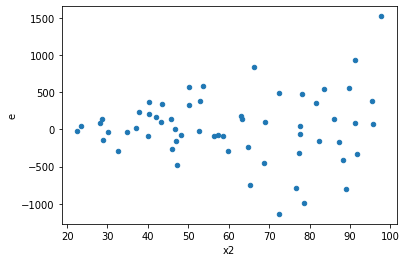

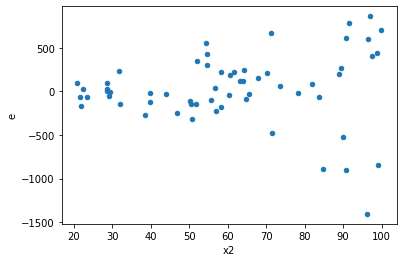

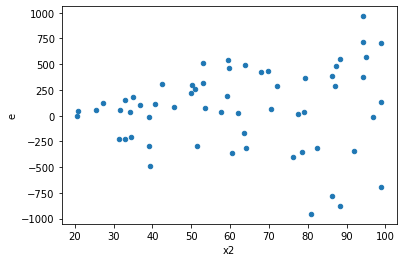

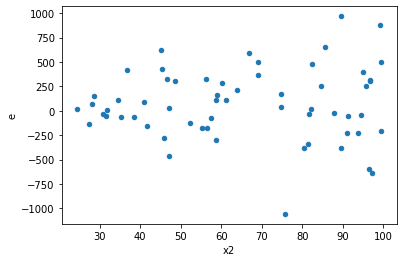

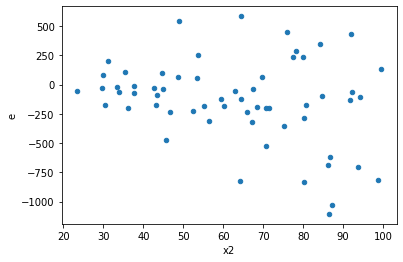

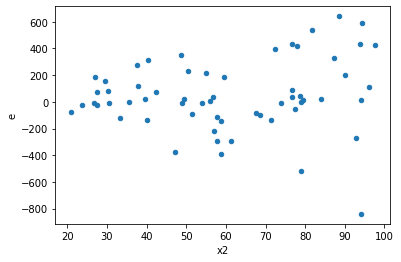

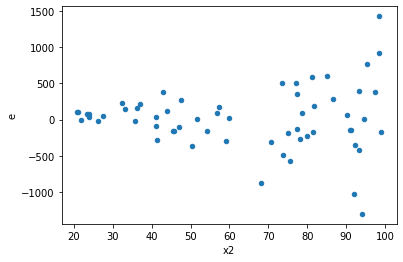

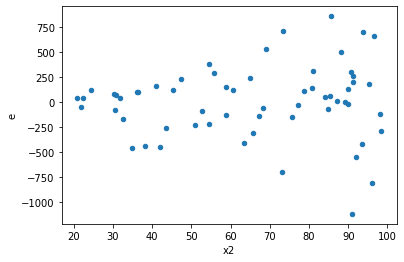

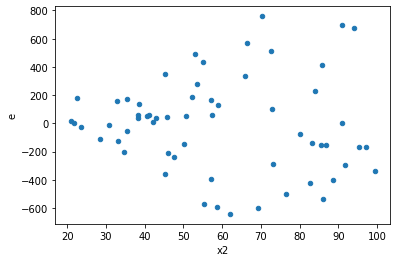

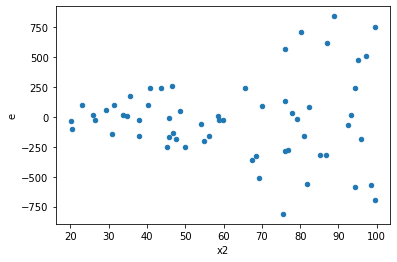

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,1907683.300920178,6510408.665252733,90842.0619485799,310019.46025013016,3.41273033218481,0.00693936223210434,0.9965303188839478,0.00346968111605217,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,1576016.543394562,2294691.4041226218,75048.40682831248,109271.01924393437,1.456007180724204,0.3963282618663575,0.8018358690668212,0.19816413093317875,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,2460674.250491621,3126741.6644994593,117174.96430912481,148892.46021425998,1.2706849205557234,0.5879837645733883,0.7060081177133058,0.29399188228669415,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,2546441.183885785,3595139.544425274,121259.10399456118,171197.12116310827,1.4118290134387514,0.4359879107360842,0.7820060446319579,0.2179939553680421,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,827913.7689344276,2338249.0049366555,39424.4651873537,111345.19071126932,2.824266358012279,0.02135918773200718,0.9893204061339964,0.01067959386600359,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1826969.5752003745,4674392.377302977,86998.55120001783,222590.11320490367,2.5585496555356206,0.036596473986539646,0.9817017630067302,0.018298236993269823,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,1564841.9213148786,3815515.492436235,74516.28196737517,181691.213925535,2.4382753557817516,0.04698346108728124,0.9765082694563594,0.02349173054364062,Reject001=1 : Homoscedasticity
14.0,21.0,21.0,491201.1148952942,4945343.501973182,23390.529280728293,235492.54771300865,10.067858870856483,1.7398705578486329e-06,0.9999991300647211,8.699352789243164e-07,Reject001=0 : Heteroscedasticity
15.0,21.0,21.0,3260870.5200029467,3840759.349514121,155279.54857156888,182893.3023578153,1.1778325223139037,0.7110933341114833,0.6444533329442583,0.35554666705574167,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1907683.300920178,6510408.665252733,90842.0619485799,310019.46025013016,3.41273033218481,0.00693936223210434,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,1576016.543394562,2294691.4041226218,75048.40682831248,109271.01924393437,1.456007180724204,0.3963282618663575,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,2460674.250491621,3126741.6644994593,117174.96430912481,148892.46021425998,1.2706849205557234,0.5879837645733883,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,2546441.183885785,3595139.544425274,121259.10399456118,171197.12116310827,1.4118290134387514,0.4359879107360842,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,3243143.857528658,1067390.5603770483,154435.42178707896,50828.121922716586,0.3291221750460437,0.014034447080438016,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,827913.7689344276,2338249.0049366555,39424.4651873537,111345.19071126932,2.824266358012279,0.02135918773200718,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1826969.5752003745,4674392.377302977,86998.55120001783,222590.11320490367,2.5585496555356206,0.036596473986539646,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,1564841.9213148786,3815515.492436235,74516.28196737517,181691.213925535,2.4382753557817516,0.04698346108728124,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,2288451.455543551,1568170.0550601776,108973.8788354072,74674.76452667512,0.6852537995776306,0.3934996075513706,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      579
Reject001=0 : Heteroscedasticity    421
Name: Result_test, dtype: int64